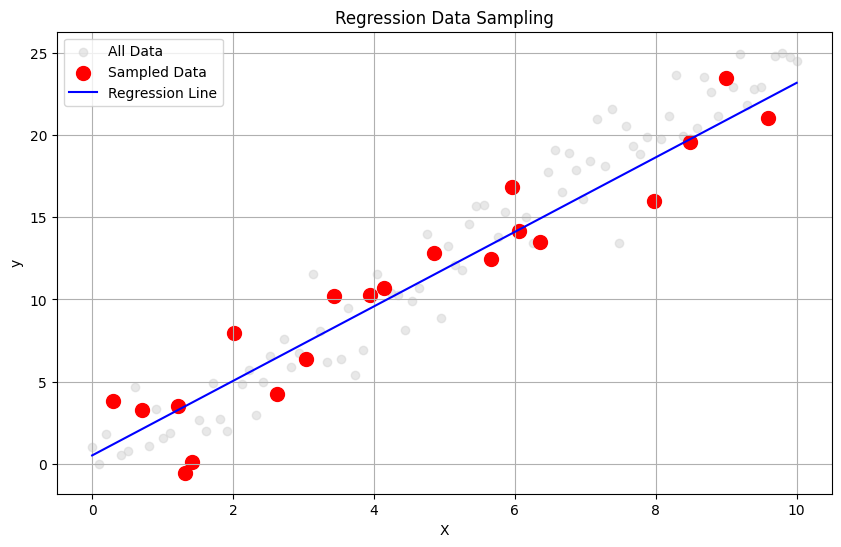

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 10, 100)  # 100 points from 0 to 10
y = 2.5 * X + np.random.normal(0, 2, size=X.shape)  # Linear relation with noise

# Sample a subset of the data
sample_size = 20
indices = np.random.choice(len(X), size=sample_size, replace=False)
X_sample = X[indices]
y_sample = y[indices]

# Fit a linear regression model to the sampled data
coefficients = np.polyfit(X_sample, y_sample, 1)  # Fit a linear model
linear_model = np.poly1d(coefficients)

# Generate points for the regression line
X_line = np.linspace(0, 10, 100)
y_line = linear_model(X_line)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightgray', label='All Data', alpha=0.5)
plt.scatter(X_sample, y_sample, color='red', label='Sampled Data', s=100)
plt.plot(X_line, y_line, color='blue', label='Regression Line')
plt.title('Regression Data Sampling')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


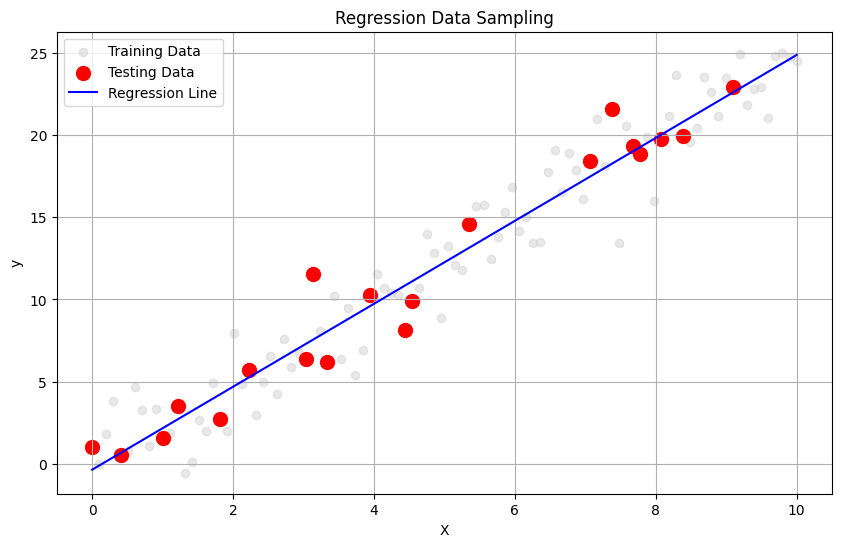

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 10, 100)  # 100 points from 0 to 10
y = 2.5 * X + np.random.normal(0, 2, size=X.shape)  # Linear relation with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% for testing, 80% for training

# Fit a linear regression model to the training data
coefficients = np.polyfit(X_train, y_train, 1)  # Fit a linear model
linear_model = np.poly1d(coefficients)

# Generate points for the regression line
X_line = np.linspace(0, 10, 100)
y_line = linear_model(X_line)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='lightgray', label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='Testing Data', s=100)
plt.plot(X_line, y_line, color='blue', label='Regression Line')
plt.title('Regression Data Sampling')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5217
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4621
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4617
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4716
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4547
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4320
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4152
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4050 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4032
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3954
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3763
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3554
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3396
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3243
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2975
Epoch 16/100
3/3 ━━━━━━━━━━━━━

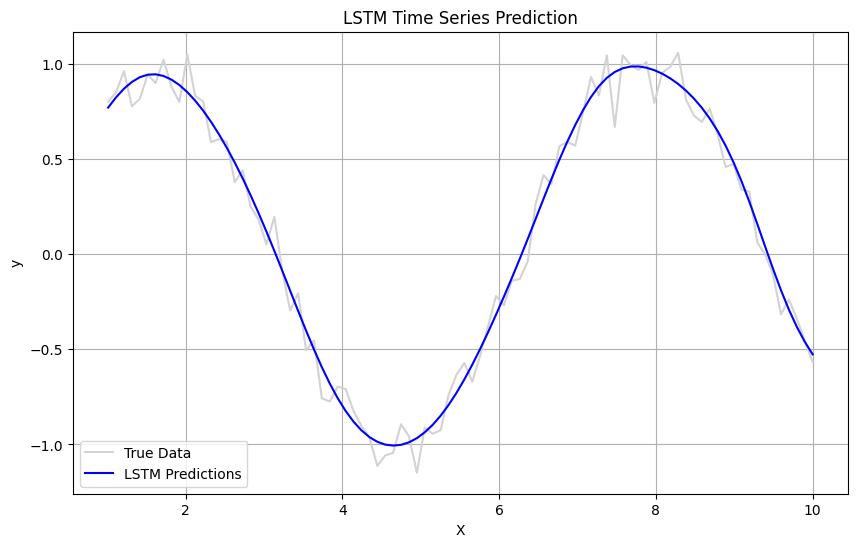

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic time series data
time_steps = 100
X = np.linspace(0, 10, time_steps)
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)  # Sinusoidal data with noise

# Prepare the data for LSTM (reshape for 3D input)
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 10
X_lstm, y_lstm = create_dataset(X, y, time_step)

# Reshape input to be [samples, time steps, features]
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Define the LSTM model
model = keras.Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    layers.LSTM(50),
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the generated data
model.fit(X_lstm, y_lstm, epochs=100, verbose=1)

# Generate predictions
y_pred = model.predict(X_lstm)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X[time_step:], y[time_step:], label='True Data', color='lightgray')
plt.plot(X[time_step:], y_pred, label='LSTM Predictions', color='blue')
plt.title('LSTM Time Series Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
